# Quiz # 3

## Business Problem

The Kepler Space Observatory is a NASA-build satellite that was launched in 2009. The telescope is dedicated to searching for exoplanets in star systems besides our own, with the ultimate goal of possibly finding other habitable planets besides our own. The original mission ended in 2013 due to mechanical failures, but the telescope has nevertheless been functional since 2014 on a "K2" extended mission.

Kepler had verified 1284 new exoplanets as of May 2016. As of October 2017 there are over 3000 confirmed exoplanets total (using all detection methods, including ground-based ones). The telescope is still active and continues to collect new data on its extended mission.

## Packages Import

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

## Data Import

The information was downloaded from a freely available dataset from [Kaggle](https://www.kaggle.com/nasa/kepler-exoplanet-search-results)

In [ ]:
df_exoplanets = pd.read_csv('/work/indu5000_quiz_3/Data/Kepler_Exoplanet_Search_Results.csv')
df_exoplanets.head(3)

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436


In [ ]:
df_exoplanets.columns

Index(['rowid', 'kepid', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1',
       'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

This dataset is a cumulative record of all observed Kepler "objects of interest" basically, all of the approximately 10,000 exoplanet candidates Kepler has taken observations on.

This dataset has an extensive data dictionary, which can be accessed [here](https://exoplanetarchive.ipac.caltech.edu/docs/API_kepcandidate_columns.html). Highlightable columns of note are:

- *kepoi_name*: A KOI is a target identified by the Kepler Project that displays at least one transit-like sequence within Kepler time-series photometry that appears to be of astrophysical origin and initially consistent with a planetary transit hypothesis
- *kepler_name*: These names are intended to clearly indicate a class of objects that have been confirmed or validated as planets—a step up from the planet candidate designation.
- *koi_disposition*: The disposition in the literature towards this exoplanet candidate. One of CANDIDATE, FALSE POSITIVE, NOT DISPOSITIONED or CONFIRMED.
- *koi_pdisposition*: The disposition Kepler data analysis has towards this exoplanet candidate. One of FALSE POSITIVE, NOT DISPOSITIONED, and CANDIDATE.
- *koi_score*: A value between 0 and 1 that indicates the confidence in the KOI disposition. For CANDIDATEs, a higher value indicates more confidence in its disposition, while for FALSE POSITIVEs, a higher value indicates less confidence in that disposition.
- *koi_ror*: The planet radius divided by the stellar radius.

## Questions

### Question 1

What can be said about this next graph?

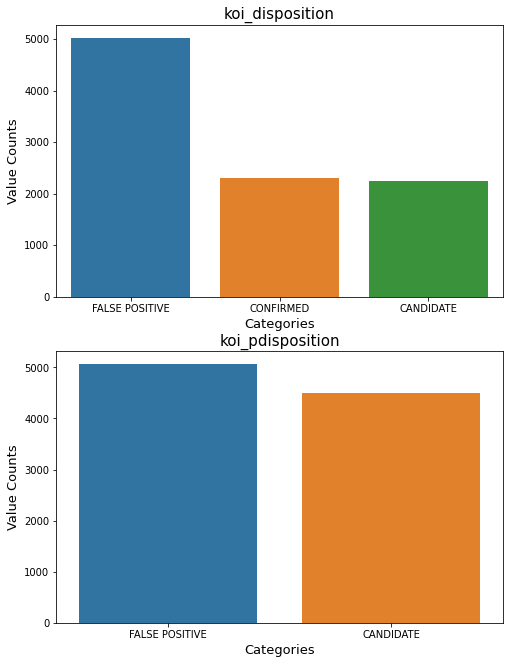

In [ ]:
fig, axarr = plt.subplots(2, 1, figsize=(8, 11))

df_exoplanets_grouped_koi_disposition = df_exoplanets['koi_disposition'].value_counts()
sns.barplot(x=df_exoplanets_grouped_koi_disposition.index,y=df_exoplanets_grouped_koi_disposition.values, ax=axarr[0]);
axarr[0].set_title("koi_disposition", fontsize=15);
axarr[0].set_xlabel('Categories', fontsize=13);
axarr[0].set_ylabel('Value Counts', fontsize=13);

df_exoplanets_grouped_koi_pdisposition = df_exoplanets['koi_pdisposition'].value_counts()
sns.barplot(x=df_exoplanets_grouped_koi_pdisposition.index,y=df_exoplanets_grouped_koi_pdisposition.values, ax=axarr[1]);
axarr[1].set_title("koi_pdisposition", fontsize=15);
axarr[1].set_xlabel('Categories', fontsize=13);
axarr[1].set_ylabel('Value Counts', fontsize=13);

### Question 2

What can be said about this next graph?

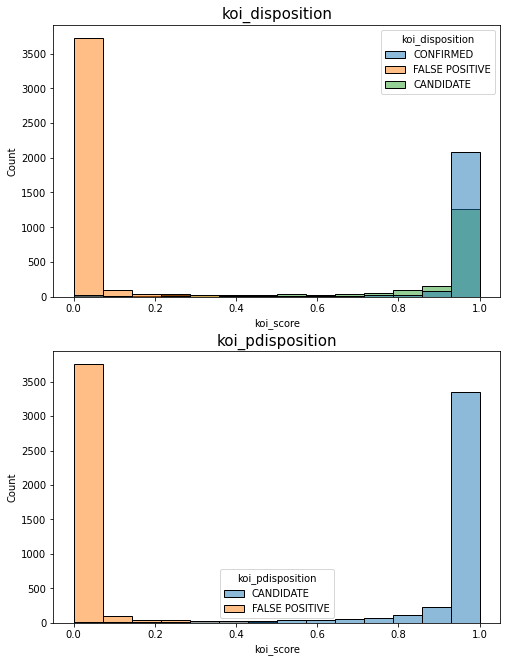

In [ ]:
fig, axarr = plt.subplots(2, 1, figsize=(8, 11))

sns.histplot(data= df_exoplanets,x='koi_score',hue='koi_disposition',ax=axarr[0])
axarr[0].set_title("koi_disposition", fontsize=15);

sns.histplot(data= df_exoplanets,x='koi_score',hue='koi_pdisposition',ax=axarr[1])
axarr[1].set_title("koi_pdisposition", fontsize=15);

### Question 3

What can be said about this next graph?

(0.0, 10.0)

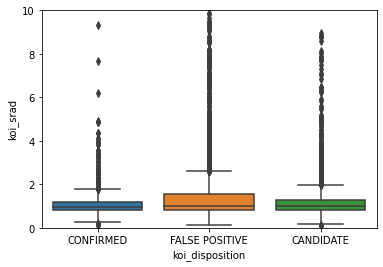

In [ ]:
sns.boxplot(
    x='koi_disposition',
    y='koi_srad',
    data=df_exoplanets
)
plt.ylim(bottom = 0, top=10)

### Question 4

What can be said about this next graph?

<AxesSubplot:xlabel='koi_disposition', ylabel='koi_steff'>

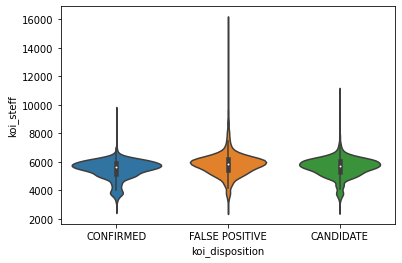

In [ ]:
sns.violinplot(
    x='koi_disposition',
    y='koi_steff',
    data=df_exoplanets
)


### Question 5

What can be said about this next graph?

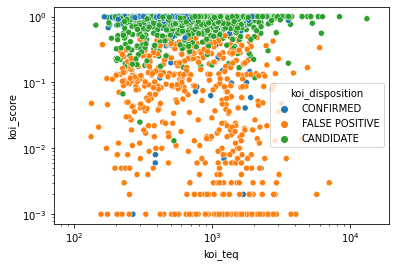

In [ ]:
sns.scatterplot(data=df_exoplanets,x='koi_teq',y ='koi_score',hue='koi_disposition')
#plt.ylim(bottom = 0, top=10)
plt.yscale('log')
plt.xscale('log')

### Question 5

What can be said about this next graph?

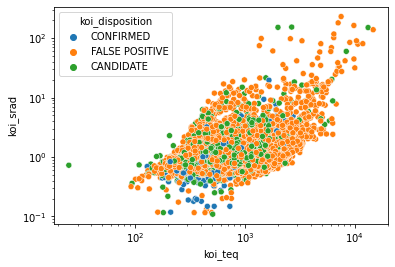

In [ ]:
sns.scatterplot(data=df_exoplanets,x='koi_teq',y ='koi_srad',hue='koi_disposition')
#plt.ylim(bottom = 0, top=10)
plt.yscale('log')
plt.xscale('log')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c3e4079d-b65d-4f98-a9c4-e84568c199f2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>